In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv('Mall_Customers.csv')

In [94]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
data.shape

(200, 5)

In [96]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [97]:
data.Gender.value_counts().div(data.Gender.count()).mul(100)

Female    56.0
Male      44.0
Name: Gender, dtype: float64

The ratio of males to females is 44:56 in the dataset.

<AxesSubplot:xlabel='Age'>

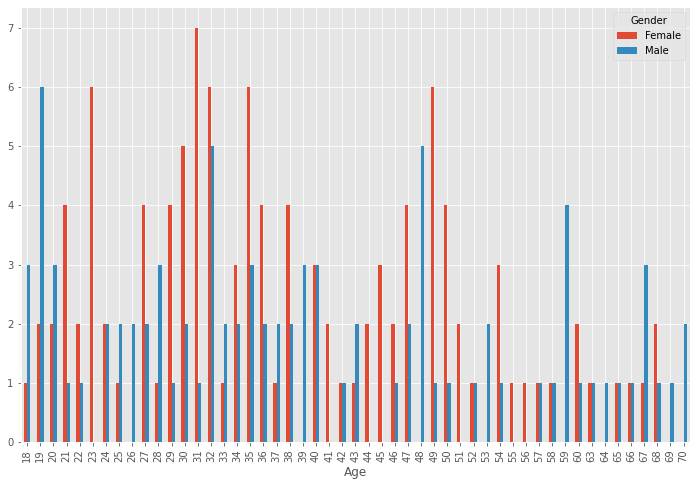

In [21]:
age = pd.pivot_table(data,index='Age',columns='Gender',values='CustomerID',aggfunc='count')

import matplotlib.style as style 
style.use('ggplot')

age.plot(kind='bar',figsize=(12,8))

<AxesSubplot:xlabel='Gender', ylabel='Age'>

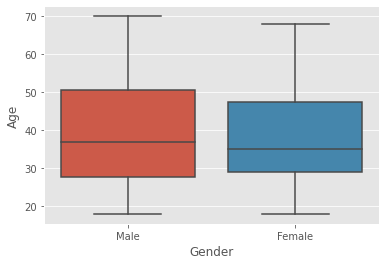

In [22]:
sns.boxplot(x="Gender", y="Age", data=(data))

In [23]:
data.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


The age of the both gender is very similar across the dataset.

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

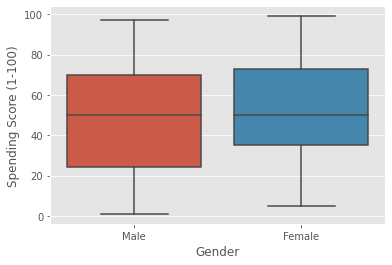

In [26]:
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=(data))

In [100]:
data.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

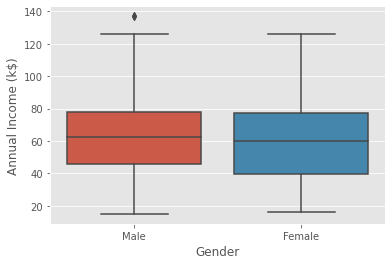

In [27]:
sns.boxplot(x="Gender", y="Annual Income (k$)", data=(data))

In [101]:
data.groupby('Gender')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


<AxesSubplot:>

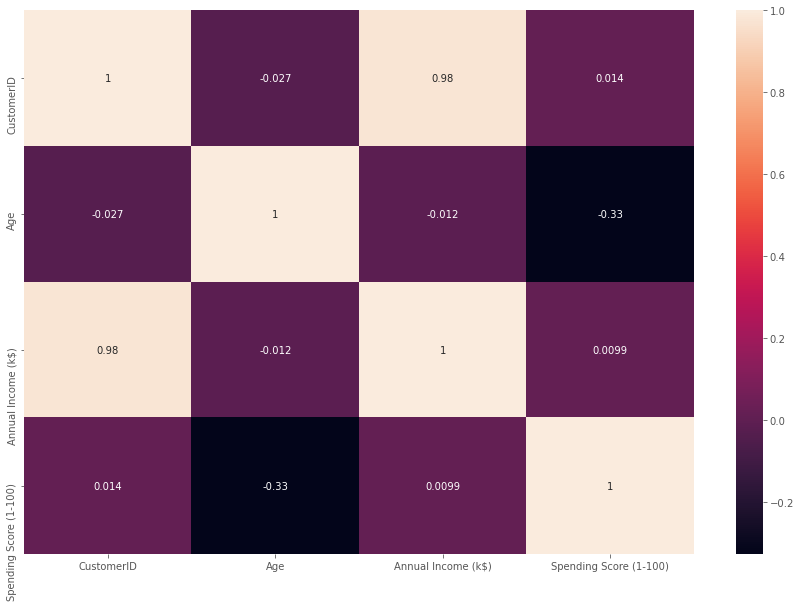

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

There is a weak correlation between Age and Spending Score.

In [36]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num,Male,Female
0,1,Male,19,15,39,1,1,0
1,2,Male,21,15,81,1,1,0
2,3,Female,20,16,6,0,0,1
3,4,Female,23,16,77,0,0,1
4,5,Female,31,17,40,0,0,1


## Scaling the data

In [102]:
data = data.drop(['CustomerID','Gender'],axis=1)

In [103]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

## K-Mean Clustering

In [104]:
#loading the library 
from sklearn.cluster import KMeans

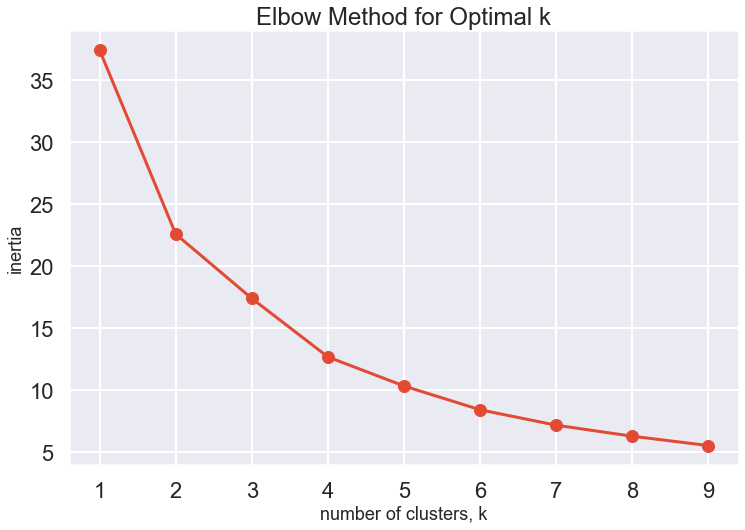

In [105]:
X = data_transformed
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    result= model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.title('Elbow Method for Optimal k')
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k',fontsize=18)
plt.ylabel('inertia',fontsize=18)
plt.xticks(ks)
plt.show()

In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3.

In [106]:
Km = KMeans(n_clusters=3).fit(data_transformed)
labels = Km.labels_

In [107]:
new_labels = pd.DataFrame({'Labels':labels})

df = pd.concat([data,new_labels],axis=1)

In [108]:
df.Labels.value_counts()

0    94
1    67
2    39
Name: Labels, dtype: int64

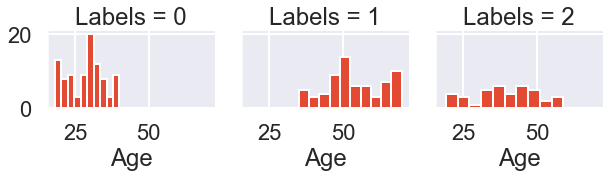

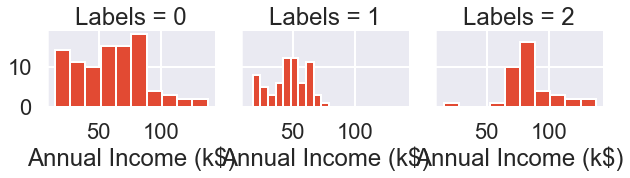

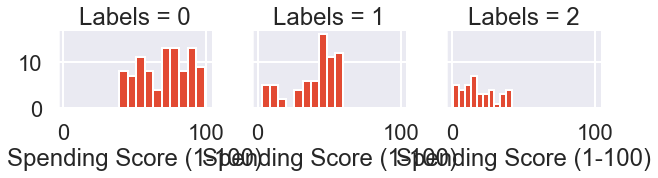

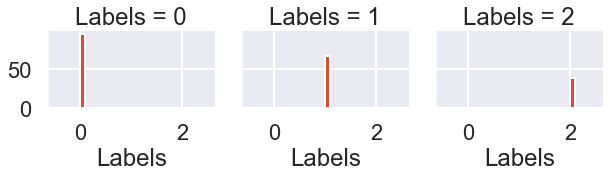

In [109]:

for c in df:
    grid =sns.FacetGrid(df,col='Labels')
    grid.map(plt.hist,c)
    pd.reset_option("display.max_rows")

In [110]:
df.groupby('Labels').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Labels,,,
0,28.457447,60.244681,70.446809
1,53.417910,46.955224,39.820896
2,38.871795,84.692308,19.230769


In [ ]:
Cluster 0 : Customer is more likely to spend money at the mall.
    - The Customer is young with Average Annual Income and above average Spending Score. 

Cluster 1 : Customer is less likely to spend money at the mall.
    - This Customer is older with lower Annual Income and below avg spending Score.

Cluster 2: Customer is less likely to spend money at the mall.
    - This Customer has a median age with Higher Annual Income and very low spending score

In [111]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [112]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [113]:
data['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64